
# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the coefficient
of determination are also calculated.


Coefficients:  [[938.23786125]]
Mean squared error:  2548.0723987259703
Coefficient of determination:  0.47257544798227136


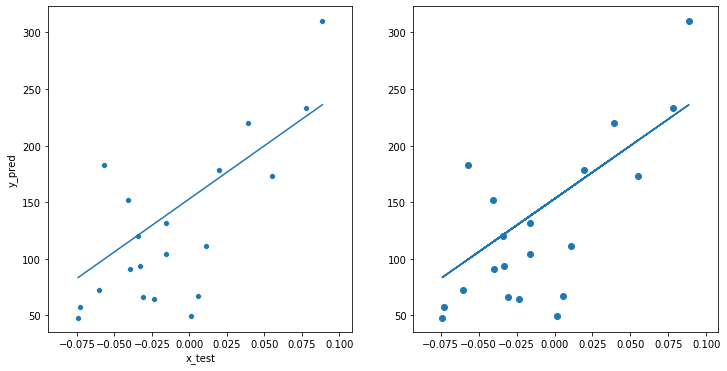

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
# datasets 은 sklearn 에서 data 를 가져오기위함이다.
from sklearn.metrics import mean_squared_error, r2_score
# sklearn.metrics 에서 mse 와 r_2 를 계산해주는 method 이다.

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
# x,y 데이터를 예로 불러오는 과정이다. 스킵 가능.
# diabetes_y 의 shape 는 (442,)
diabetes_y = diabetes_y.reshape(442,1)
# 웬만해서는 x 와 y 의 데이터 shape 를 맞추어주자. 물론 (442,) 에서도 작동하기는 하나, 점차 어려워질수록 shape 맞추어주는게 중요

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]
#diabetes_X = diabetes_X[:,2:3] 도 가능하다.
#diabetes.data[:, np.newaxis, 2]에서 ':' 는 전체 행을 가져오고 'np.newaxis'로 차원을 하나 늘려준 후 '2'로 3번째 열의 데이터를 가져오게 됩니다.
#diabetes_X.shape 는 (442, 1)

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
# train set 은 442-20 개 선택!
diabetes_X_test = diabetes_X[-20:]
# test set 은 20개 선택!

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]
# target(y값) 역시 똑같은 수로 맞춰주어야 한다.

# Create linear regression object
regr = linear_model.LinearRegression()

# train set 을 이용해서 regression 을 fitting 하자
regr.fit(diabetes_X_train, diabetes_y_train)

# test set 을 이용하여 prediction 값을 계산하자.
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: ', regr.coef_)
# The mean squared error
print('Mean squared error: ',mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination
print('Coefficient of determination: ',r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.figure(figsize=(12,6))
# 그래프 크기가 작아서 좀 늘려보았다. 

# using sns
data = pd.DataFrame(np.hstack([diabetes_X_test, diabetes_y_test,diabetes_y_pred]),columns=['x_test','y_test','y_pred'])
# sns 는 pandas 데이터로 만들어 준 이후에 쓸 수 있다.
plt.subplot(121)
ax = sns.scatterplot('x_test','y_test', data=data)
ax = sns.lineplot(x='x_test', y='y_pred', data=data)

#using plt
# Plot outputs
plt.subplot(122)
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, diabetes_y_pred)
